# ScRNA-Seq of human bone marrow cells

In [1]:
# Import packages
import scanpy as sc
import pandas as pd
from functions import data_preprocessing as dp
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Read AnnData and add metadata information

In [2]:
file_paths = '../../../../data/processed/immune_cells/bone_marrow_human/'

filenames = ['BM_1_adata.h5ad', 'BM_2_adata.h5ad', 'BM_3_adata.h5ad', 'BM_4_adata.h5ad', 'BM_5_adata.h5ad']

adata = []
samp_let = ['A', 'P', 'U', 'T', 'N']
for k, name in enumerate(filenames):
    file = file_paths + name
    adata_temp = sc.read(file, cache=True)
    adata_temp.obs['patientID'] = ['Oetjen_'+samp_let[k]]*adata_temp.n_obs
    adata_temp.obs['study'] = ['Oetjen']*adata_temp.n_obs
    adata_temp.obs['chemistry'] = ['v2_10X']*adata_temp.n_obs
    adata_temp.obs['tissue'] = ['Bone_Marrow']*adata_temp.n_obs
    adata_temp.obs['species'] = ['Human']*adata_temp.n_obs
    adata_temp.obs['data_type'] = ['UMI']*adata_temp.n_obs
    adata.append(adata_temp) 


In [3]:
adata = adata[0].concatenate(adata[1:], batch_key='sample_ID', 
                                               batch_categories=['Oetjen_A','Oetjen_P', 'Oetjen_U', 'Oetjen_T', 'Oetjen_N'])

adata.obs.index.rename('barcode', inplace=True)
# Assign adata.X to be the preprocessed unnormalized data
adata.X = adata.layers['pp_counts']

adata

AnnData object with n_obs × n_vars = 14779 × 10462
    obs: 'n_counts', 'log_n_counts', 'n_genes', 'log_n_genes', 'pct_counts_in_top_20_genes', 'mt_frac', 'ribo_frac', 'hem_frac', 'outlier', 'size_factors', 'cell_type', 'patientID', 'study', 'chemistry', 'tissue', 'species', 'data_type', 'sample_ID'
    var: 'gene_id', 'n_cells-Oetjen_A', 'highly_variable-Oetjen_A', 'means-Oetjen_A', 'dispersions-Oetjen_A', 'dispersions_norm-Oetjen_A', 'n_cells-Oetjen_N', 'highly_variable-Oetjen_N', 'means-Oetjen_N', 'dispersions-Oetjen_N', 'dispersions_norm-Oetjen_N', 'n_cells-Oetjen_P', 'highly_variable-Oetjen_P', 'means-Oetjen_P', 'dispersions-Oetjen_P', 'dispersions_norm-Oetjen_P', 'n_cells-Oetjen_T', 'highly_variable-Oetjen_T', 'means-Oetjen_T', 'dispersions-Oetjen_T', 'dispersions_norm-Oetjen_T', 'n_cells-Oetjen_U', 'highly_variable-Oetjen_U', 'means-Oetjen_U', 'dispersions-Oetjen_U', 'dispersions_norm-Oetjen_U'
    layers: 'log1p_counts', 'pp_counts'

In [4]:
adata.obs.head(5)

,n_counts,log_n_counts,n_genes,log_n_genes,pct_counts_in_top_20_genes,mt_frac,ribo_frac,hem_frac,outlier,size_factors,cell_type,patientID,study,chemistry,tissue,species,data_type,sample_ID
barcode,,,,,,,,,,,,,,,,,,
AAACCTGCAGCGAACA-1-Oetjen_A,6379.0,8.760923,1862,7.529943,0.243769,0.047970,0.214924,0.012384,False,0.789915,Non-classical monocytes,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A
AAACCTGCATGTCCTC-1-Oetjen_A,4172.0,8.336390,1082,6.987490,0.321908,0.024928,0.456376,0.007430,False,0.516893,Memory CD4+ T cells,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A
AAACCTGGTCGACTGC-1-Oetjen_A,6608.0,8.796187,1618,7.389564,0.241979,0.051907,0.314770,0.012561,False,0.817825,Classical Monocytes,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A
AAACCTGGTCGCTTCT-1-Oetjen_A,5034.0,8.524169,1413,7.254178,0.265793,0.041716,0.264998,0.008741,False,0.623572,Classical Monocytes,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A
AAACCTGTCCCGACTT-1-Oetjen_A,3998.0,8.293799,1127,7.028201,0.292646,0.043522,0.397949,0.013007,False,0.495061,Memory CD4+ T cells,Oetjen_A,Oetjen,v2_10X,Bone_Marrow,Human,UMI,Oetjen_A


## Visualize

In [5]:
# Normalize
adata = dp.log1p_normalize(adata)

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


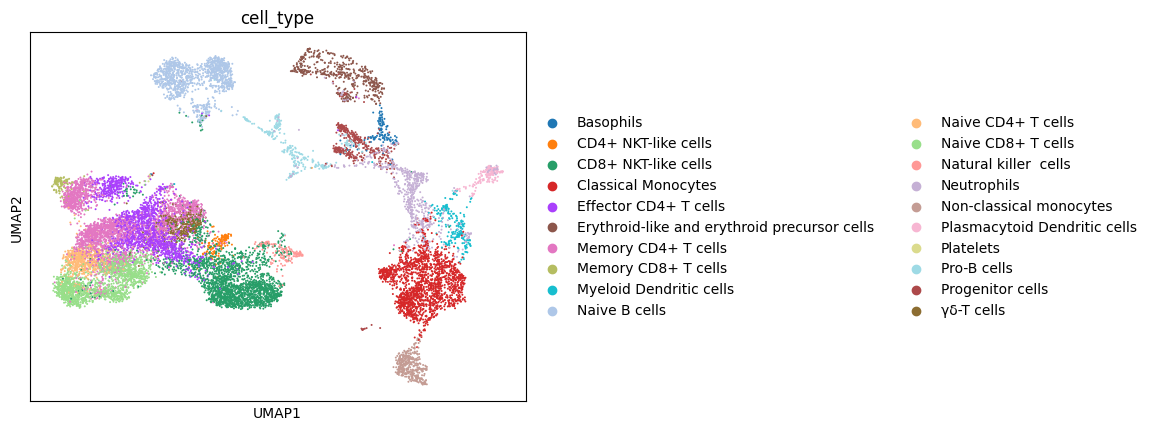

In [6]:
from sklearn.preprocessing import StandardScaler
vis_adata = adata.copy()
sc.pp.highly_variable_genes(vis_adata, n_top_genes=4000, flavor="cell_ranger")

# Scale data using dp.scale_data() to subtract data by the mean of each feature and divide by the std of that feature.
# This was done as a preprocessing step for annotating cell types in ScType in R and will therefore be used for visualization purpose. 
# https://github.com/satijalab/seurat/issues/1166  
vis_adata.X = dp.scale_data(vis_adata.X)

sc.pp.pca(vis_adata, n_comps=40, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(vis_adata, n_neighbors=15, n_pcs=40)
sc.tl.umap(vis_adata)
sc.pl.umap(vis_adata, color='cell_type')

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


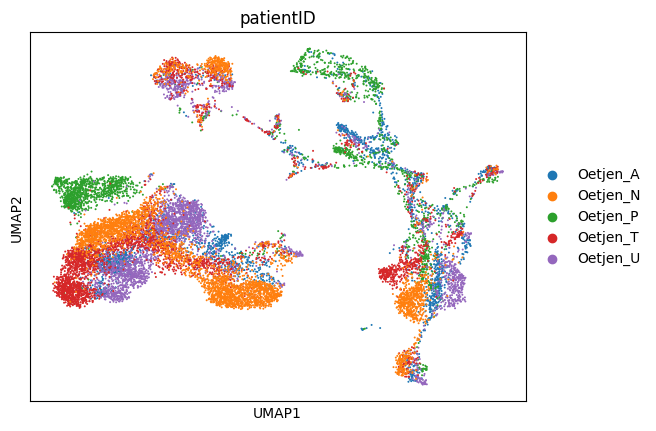

In [7]:
sc.pl.umap(vis_adata, color='patientID')

## Download processed data, including labels

In [8]:
adata.write("../../../../data/processed/immune_cells/merged/Oetjen_merged.h5ad")